In [124]:
import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
import pickle
import random

In [169]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
import warnings
warnings.simplefilter('ignore')

### Путь к директорию и файлу.

In [129]:
DATA_LUNG_CANCER = 'survey lung cancer.csv'

In [130]:
df = pd.read_csv(DATA_LUNG_CANCER)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [131]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

#### Описание датасета.
- **GENDER** (пол): M [Male], F [Female]
- **AGE**(возраст) 
- **SMOKING**(курение): 2 [Yes], 1 [No]
- **YELLOW_FINGERS**(жёлтые пальцы): 2 [Yes], 1 [No]
- **ANXIETY**(тревожность): 2 [Yes], 1 [No]
- **PEER_PRESSURE**(давление социума): 2 [Yes], 1 [No]
- **CHRONIC DISEASE**(хронические заболевания): 2 [Yes], 1 [No]
- **FATIGUE**(усталость): 2 [Yes], 1 [No]
- **ALLERGY**(алергии): 2 [Yes], 1 [No]
- **WHEEZING**(хрипы): 2 [Yes], 1 [No]
- **ALCOHOL CONSUMING**(употребление алкоголя): 2 [Yes], 1 [No]
- **COUGHING**(кашель): 2 [Yes], 1 [No]
- **SHORTNESS OF BREATH**(одышка): 2 [Yes], 1 [No]
- **SWALLOWING DIFFICULTY**(трудности с глотанием): 2 [Yes], 1 [No]
- **CHEST PAIN**(боль в груди): 2 [Yes], 1 [No]
- **LUNG_CANCER**(рак лёекого): YES [положительно], NO [отрицательно]

In [132]:
df.shape

(309, 16)

In [133]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [134]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [135]:
df.LUNG_CANCER.value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

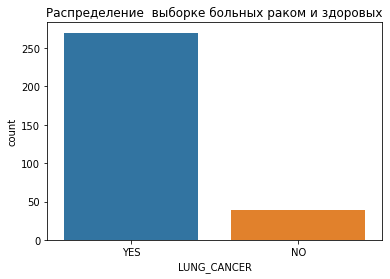

In [136]:
sns.countplot(x=df.LUNG_CANCER, data=df)
plt.title('Распределение  выборке больных раком и здоровых')
plt.show()

In [137]:
df.AGE.unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46], dtype=int64)

In [138]:
df = df.replace({2: 'Yes', 1: 'No'})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
306,M,58,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,YES
307,M,67,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,YES


In [139]:
df = df.replace({'Yes': 1, 'No': 0})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


<AxesSubplot:xlabel='AGE', ylabel='Count'>

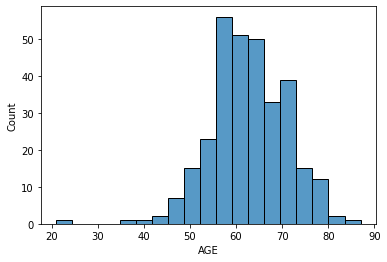

In [140]:
sns.histplot(df.AGE)

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

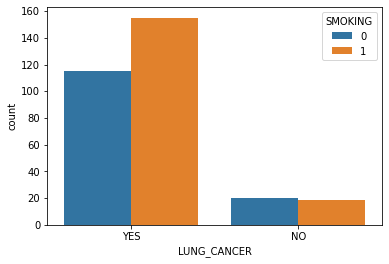

In [141]:
sns.countplot(x=df.LUNG_CANCER, hue='SMOKING', data=df)

In [142]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

df = pd.get_dummies(data=df, columns=['GENDER'])

df['LUNG_CANCER']=LabelEncoder.fit_transform(df['LUNG_CANCER'])

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0


In [143]:
TARGET_NAME = 'LUNG_CANCER'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

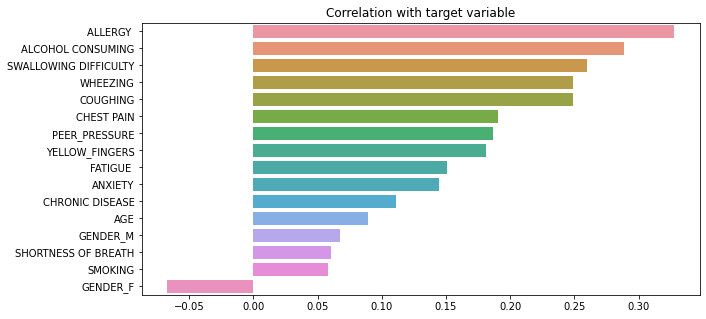

In [144]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(x= corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [179]:
X = df[BASE_FEATURE_NAMES]
y = df[TARGET_NAME]

In [180]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.25, random_state=3)

In [182]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits=2)

print(f"\nClassification Report:\n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regressionjs {lr_acc}%")



Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.94      0.96      0.95        69

    accuracy                           0.91        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.91      0.91      0.91        78


The Accuracy of Logistic Regressionjs 91.03%
